# **Quick Look at Dataset:**
> **Features Description 📜**
>- **work_year**: The year the salary was paid.
>- **experience_level**: The experience level in the job during the year with the following possible values: `EN` Entry level, `MI` Mid-level or Junior, `SE` Senior-level or Intermediate, `EX` Executive-level or Expert
>- **employment_type**: The type of employement `PT` Part-time, `FT` Full-time, `CT` Contract, `FL` Freelance
>- **job_title**: The role worked in during the year.
>- **salary**: The total gross salary amount paid.
>- **salary_currency**: The currency of the salary paid as an ISO 4217 currency code.
>- **salary_in_usd**: The salary in USD.
>- **employee_residence**: Employee's primary country of residence in during the work year as an ISO 3166 country code.
>- **remote_ratio**: The overall amount of work done remotely, possible values are as follows:
                        0 : No remote work (less than 20%)
                        50 : Partially remote
                        100 : Fully remote (more than 80%)
>- **company_location**: The country of the employer's main office or contracting branch.
>- **company_size**: The average number of people that worked for the company during the year, `S` less than 50 employees (small), `M` 50 to 250 employees (medium), `L` more than 250 employees (large)

In [1]:
pip install pycountry

Note: you may need to restart the kernel to use updated packages.


# **Import packages and load data**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
import geopandas as gpd
import pycountry
import fuzzywuzzy
from fuzzywuzzy import process

import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [3]:
df=pd.read_csv('/kaggle/input/global-ai-ml-data-science-salary/salaries.csv')

# **General Information**

In [4]:
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,EX,FT,Data Science Director,212000,USD,212000,US,0,US,M
1,2023,EX,FT,Data Science Director,190000,USD,190000,US,0,US,M
2,2023,MI,FT,Business Intelligence Engineer,35000,GBP,43064,GB,0,GB,M
3,2023,MI,FT,Business Intelligence Engineer,35000,GBP,43064,GB,0,GB,M
4,2023,SE,FT,Machine Learning Engineer,245700,USD,245700,US,0,US,M


In [5]:
df.shape

(8805, 11)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8805 entries, 0 to 8804
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           8805 non-null   int64 
 1   experience_level    8805 non-null   object
 2   employment_type     8805 non-null   object
 3   job_title           8805 non-null   object
 4   salary              8805 non-null   int64 
 5   salary_currency     8805 non-null   object
 6   salary_in_usd       8805 non-null   int64 
 7   employee_residence  8805 non-null   object
 8   remote_ratio        8805 non-null   int64 
 9   company_location    8805 non-null   object
 10  company_size        8805 non-null   object
dtypes: int64(4), object(7)
memory usage: 756.8+ KB


In [7]:
df.isna().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

<Axes: >

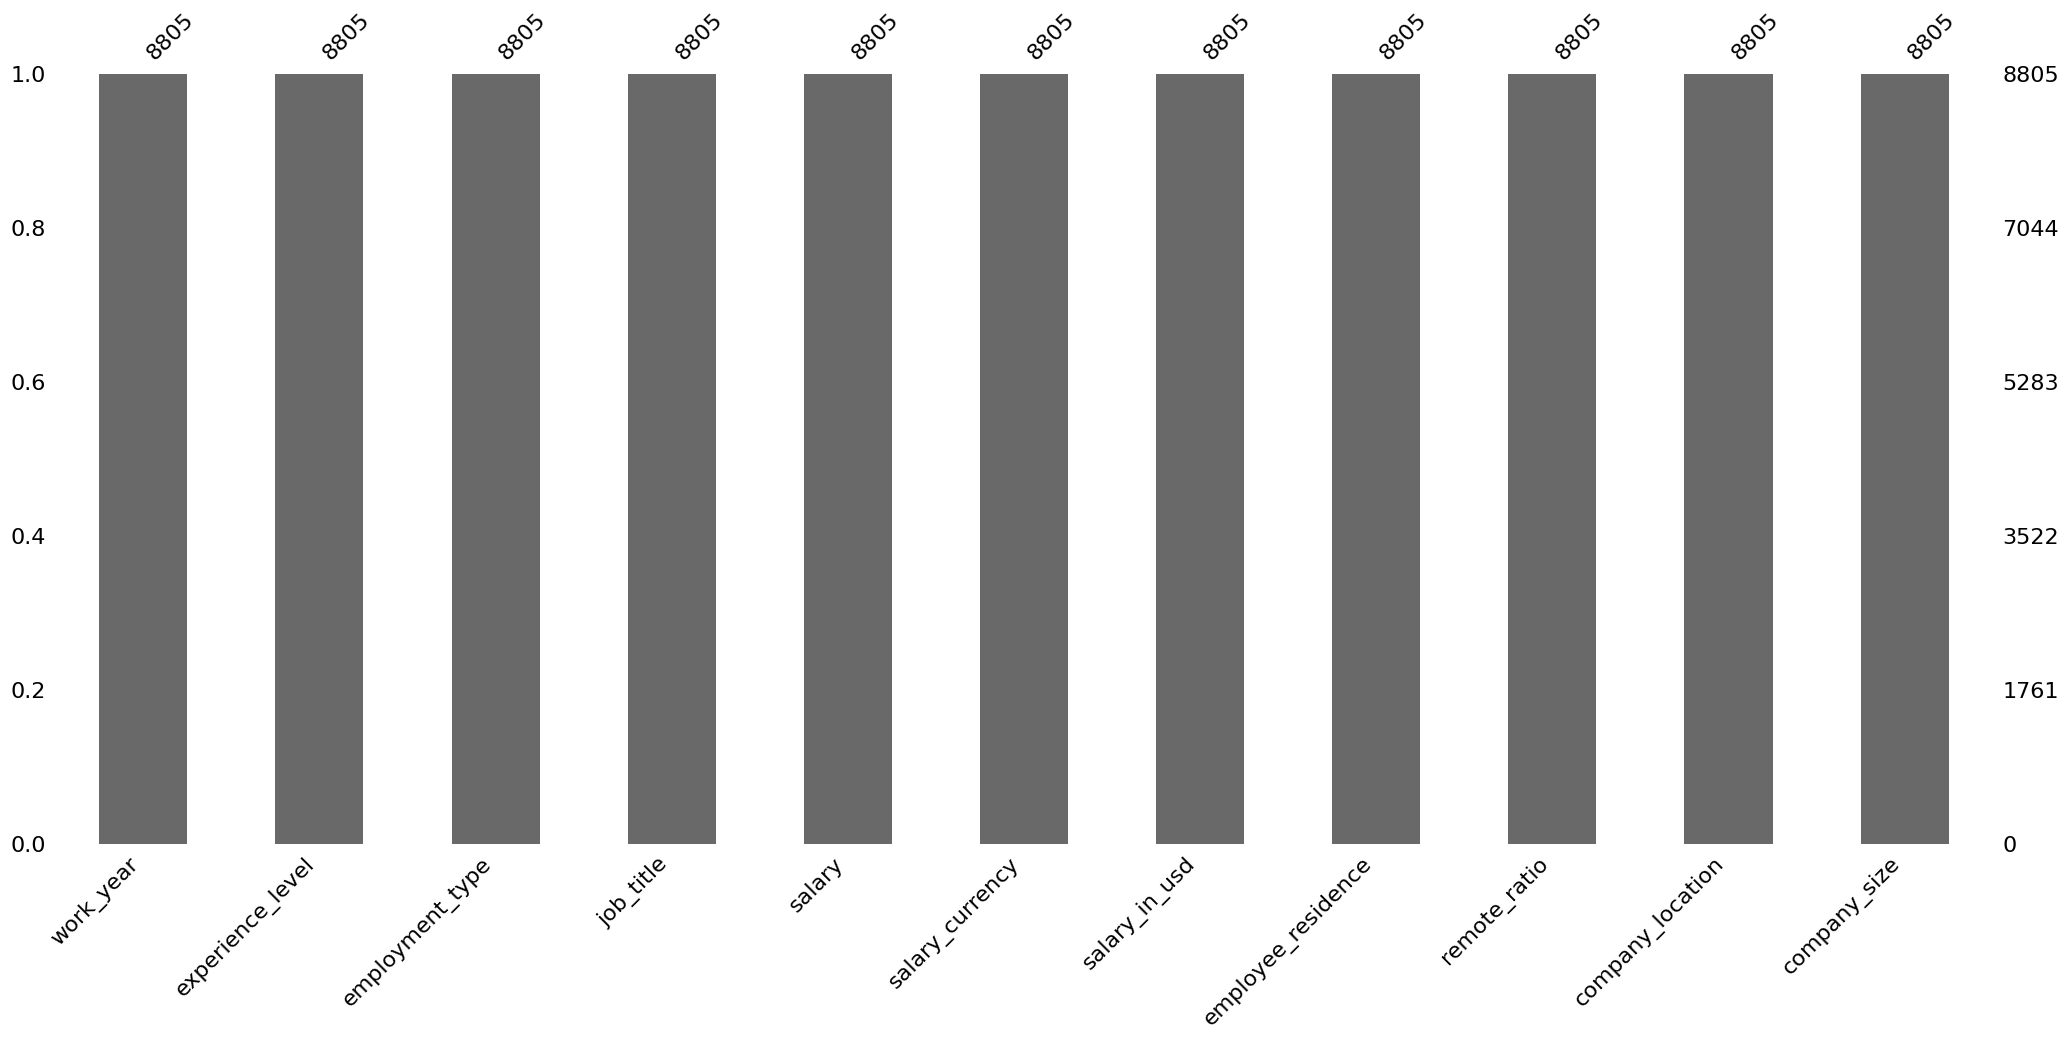

In [8]:
import missingno as msno
msno.bar(df)

In [9]:
df.duplicated().sum()

3676

In [10]:
df.drop_duplicates(inplace = True)

In [11]:
df.dtypes

work_year              int64
experience_level      object
employment_type       object
job_title             object
salary                 int64
salary_currency       object
salary_in_usd          int64
employee_residence    object
remote_ratio           int64
company_location      object
company_size          object
dtype: object

In [12]:
df.shape

(5129, 11)

# **Insight💡**


>- Data has 8805 rows and 11 columns.
>- Data has 3676 duplicate entries and be removed.
>- Data has zero missing value.
>-We will drop column salaray and salary_currency, as we have column salary_in_usd where salary in all the currencies are converted to USD.

In [13]:
df.drop(['salary_currency','salary'],axis=1,inplace=True)

In [14]:
df['experience_level'] = df['experience_level'].map({'MI' : 'MID', 'SE': 'SENIOR', 'EN' : 'ENTRY', 'EX': 'EXPERT'})
df['employment_type'] = df['employment_type'].map({ 'PT':'Part-time', 'FT' : 'Full-time', 'CT' : 'Contract', 'FL' : 'Freelance'})
df['company_size'] = df['company_size'].map({'L': 'Large','S':'Small','M':'Medium'})

# **Work Year**

In [15]:
df['work_year'].unique()

array([2023, 2022, 2020, 2021])

In [16]:
df['work_year'].value_counts()

work_year
2023    3726
2022    1112
2021     216
2020      75
Name: count, dtype: int64

In [17]:
FONT_COLOR = "#101B37"
BACKGROUND_COLOR = "#F6F5F5"
def generate_pie_chart(data, column, title, colors):
  fig = px.pie(
      df,
      names=column,
      height=540,
      width=840,
      hole=0.65,
      title=title,
      color_discrete_sequence=colors,
  )
  fig.update_layout(
      font_color=FONT_COLOR,
      title_font_size=18,
      plot_bgcolor=BACKGROUND_COLOR,
      paper_bgcolor=BACKGROUND_COLOR,
      showlegend=False,
  )
  fig.add_annotation(
      dict(
          x=0.5,
          y=0.5,
          align="center",
          xref="paper",
          yref="paper",
          showarrow=False,
          font_size=22,
          text="Total employees<br>per year",
      )
  )
  fig.update_traces(
      hovertemplate=None,
      textposition="outside",
      texttemplate="%{label}<br>%{value} - %{percent}",
      textfont_size=15,
      rotation=50,
      marker_line_width=15,
      marker_line_color=BACKGROUND_COLOR,
  )
  fig.show()

In [18]:
title = "The year in which the job information is recorded"
colors=["#333333", "#8B4789", "#3CB371", "#CDCD00"]
generate_pie_chart(df, "work_year" , title , colors)

**Note:**<br>
> It's clear that this field was not widespread in the years of 2020 and 2021, but it has spread greatly from 2022 until now.

# **Experience level**

In [19]:
df['experience_level'].unique()

array(['EXPERT', 'MID', 'SENIOR', 'ENTRY'], dtype=object)

In [20]:
df['experience_level'].value_counts()

experience_level
SENIOR    3310
MID       1224
ENTRY      382
EXPERT     213
Name: count, dtype: int64

In [21]:
def generate_bar_chart(data, hor, ver, title, colors):
  fig = px.bar(data,
             x=hor, 
             y=ver,
             color=hor,
             text=ver,
             title=title,
             color_discrete_sequence=colors,
             height=540,
             width=840)

  fig.update_traces(texttemplate='%{text}', textposition='outside')

  fig.update_layout(
    font_color=FONT_COLOR,
    title_font_size=18,
    plot_bgcolor=BACKGROUND_COLOR,
    paper_bgcolor=BACKGROUND_COLOR,
    bargap=0.2,
    bargroupgap=0.1,
    title=dict(text=title, 
               font=dict(size=25, family='Verdana')),
    font=dict(size=13, family='Verdana', color='black')
  )

  fig.show()

In [22]:
value_count = df['experience_level'].value_counts()
df1 = pd.DataFrame({'experience_level': value_count.index, 'count': value_count.values})
generate_bar_chart(df1, 'experience_level', 'count', 'Experience level count', colors)

In [23]:
df1['percent'] = round(df1['count'] / df1['count'].sum() * 100, 2)
df1['percent'] = df1['percent'].astype(str) + '%'
df1

,experience_level,count,percent
0,SENIOR,3310,64.53%
1,MID,1224,23.86%
2,ENTRY,382,7.45%
3,EXPERT,213,4.15%


**Note:**
> It's clear that the most common level is `SENIOR` and the least is the `EXPERT`. Let us see why below, if possible

* Bivariant Analysis:

***Experience level vs work year***

In [24]:
def generate_histogram_chart(data, ver, color_bar, color, title):
  fig = px.histogram(
    df,
    x=ver,
    color=color_bar,
    color_discrete_sequence=color,
    marginal="box",
    barmode="group",
    hover_data=df.columns,
    height=540,
    width=840,
    title=title,
  )
  fig.update_layout(
    font_color=FONT_COLOR,
    title_font_size=18,
    plot_bgcolor=BACKGROUND_COLOR,
    paper_bgcolor=BACKGROUND_COLOR,
    bargap=0.2,
    bargroupgap=0.1,
  )
  fig.update_traces(opacity=0.9)
  fig.show()

In [25]:
color=["#CDCD00", "#3CB371", "#8B4789", "#333333"]
generate_histogram_chart(df,
                         "work_year",
                         "experience_level",
                         color,
                         "Distribution of experience levels per work year")

**Note:**
> The only year in which the number of `mid level` greater than the number of `senior` was 2021, despite the small number of employees.

In [26]:
def country_code_to_name(country_code):
    try:
        return pycountry.countries.get(alpha_2=country_code).name
    except AttributeError:
        return country_code  

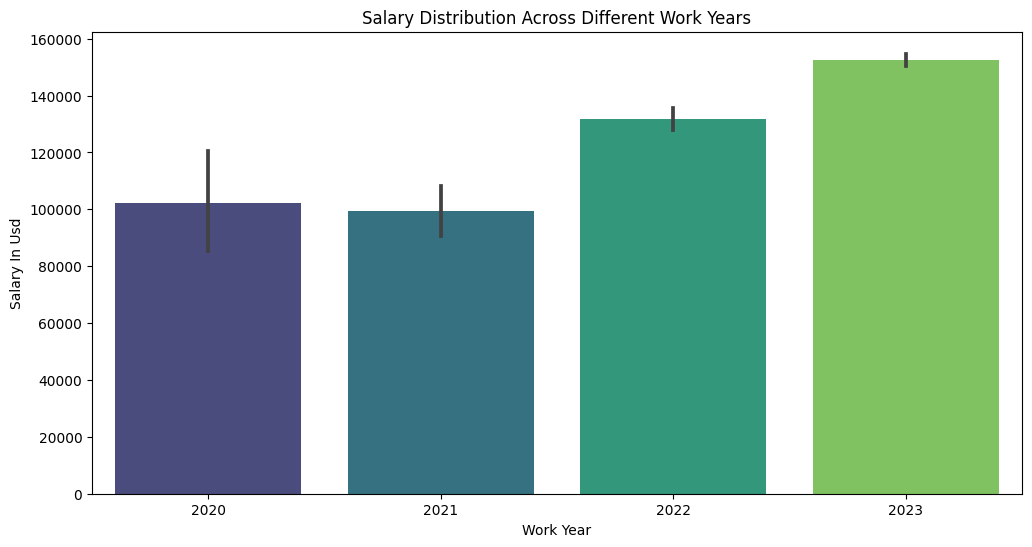

In [27]:
plt.figure(figsize=(12, 6))

sns.barplot(data=df, x='work_year', y='salary_in_usd', palette='viridis')

# Customize the plot
plt.title('Salary Distribution Across Different Work Years')
plt.xlabel('Work Year')
plt.ylabel('Salary In Usd')

# Show the plot
plt.show()

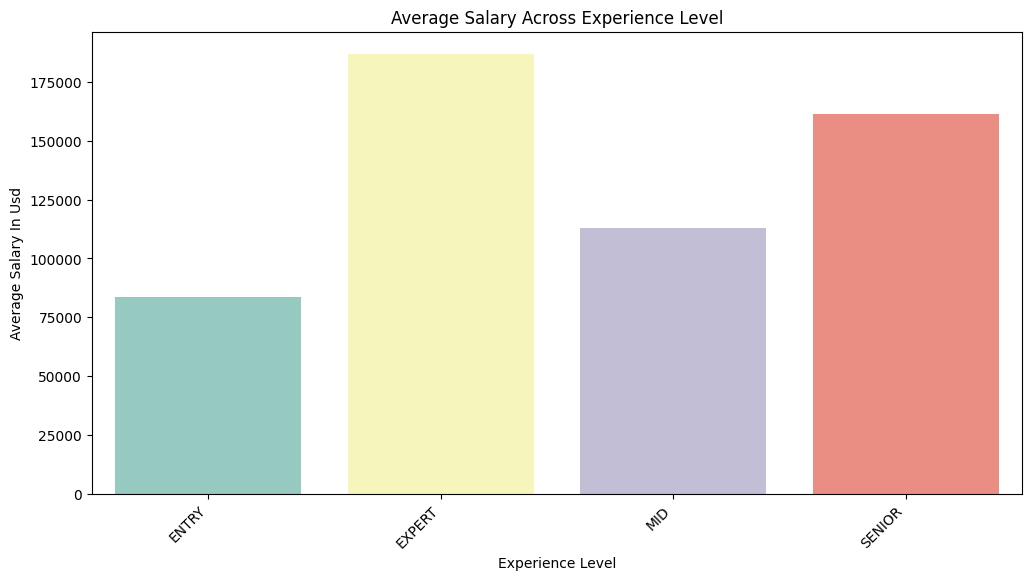

In [28]:
avg_salary_by_experience = df.groupby('experience_level')['salary_in_usd'].mean().reset_index()

plt.figure(figsize=(12, 6))

sns.barplot(x='experience_level', y='salary_in_usd', data=avg_salary_by_experience, palette='Set3')

plt.title('Average Salary Across Experience Level')
plt.xlabel('Experience Level')
plt.ylabel('Average Salary In Usd')
plt.xticks(rotation=45, ha='right')  

plt.show()

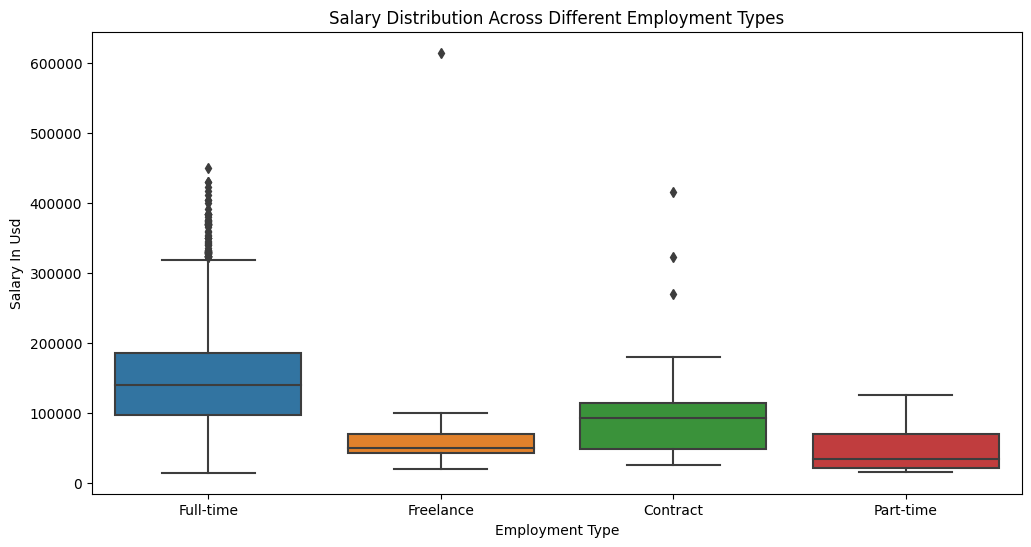

In [29]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='employment_type', y='salary_in_usd')
plt.title('Salary Distribution Across Different Employment Types')
plt.xlabel('Employment Type')
plt.ylabel('Salary In Usd')
plt.show()

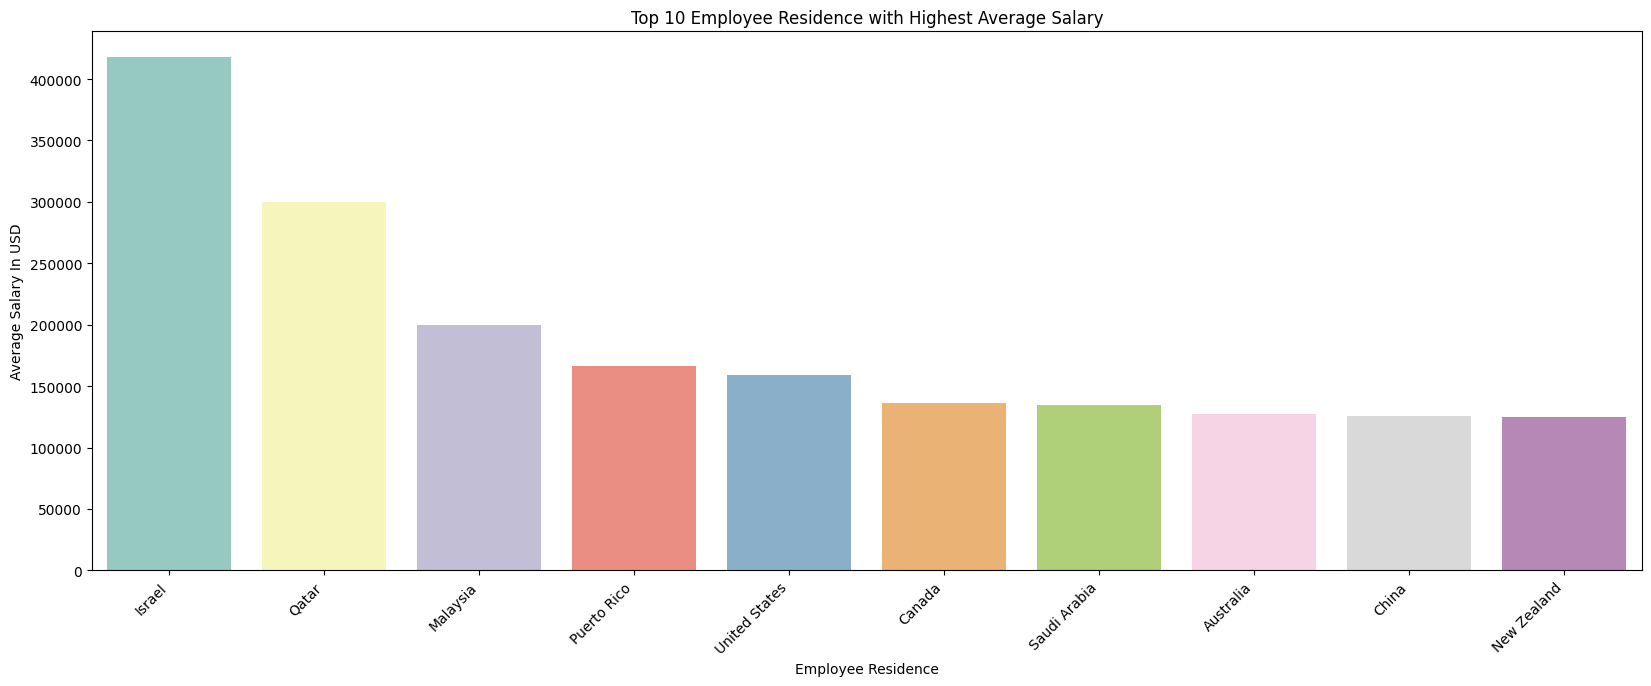

In [30]:
df['employee_residence'] = df['employee_residence'].apply(country_code_to_name)

avg_salary_by_residence = df.groupby('employee_residence', as_index=False)['salary_in_usd'].mean()

fig2 = px.choropleth(avg_salary_by_residence,
                     locations='employee_residence',
                     locationmode='country names',
                     color='salary_in_usd',
                     hover_name='employee_residence',
                     color_continuous_scale=px.colors.sequential.Plasma,
                     title='Average Salary by Employee Residence',
                     labels={'Salary In Usd': 'Average Salary'},
                     projection='natural earth')

fig2.show()


## Barchart top 10
avg_salary_by_location = df.groupby("employee_residence")["salary_in_usd"].mean().sort_values(ascending=False)

top_10_locations = avg_salary_by_location.head(10)

plt.figure(figsize=(20, 7))
sns.barplot(x=top_10_locations.index, y=top_10_locations.values, palette="Set3")
plt.title("Top 10 Employee Residence with Highest Average Salary")
plt.xlabel("Employee Residence")
plt.ylabel("Average Salary In USD")
plt.xticks(rotation=45, ha='right')
plt.show()

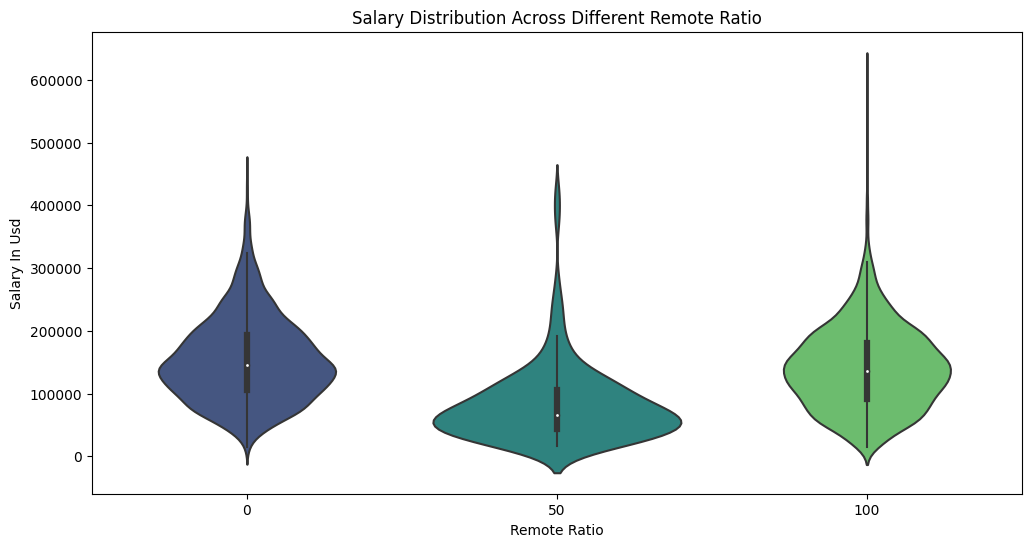

In [31]:
plt.figure(figsize=(12, 6))
sns.violinplot(data=df, x='remote_ratio', y='salary_in_usd', palette='viridis')
plt.title('Salary Distribution Across Different Remote Ratio')
plt.xlabel('Remote Ratio')
plt.ylabel('Salary In Usd')
plt.show()

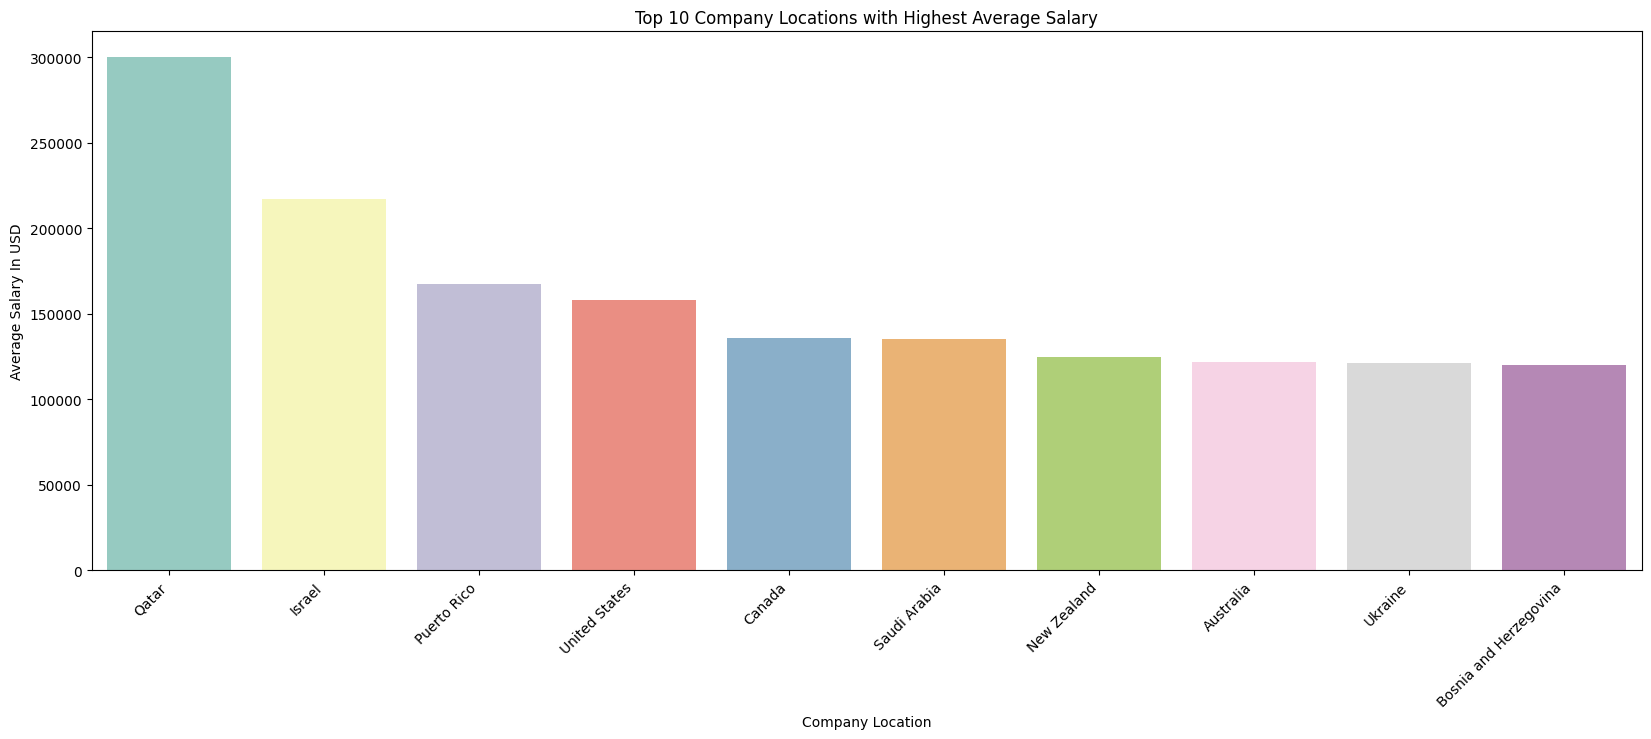

In [32]:
df['company_location'] = df['company_location'].apply(country_code_to_name)

avg_salary_by_location = df.groupby('company_location', as_index=False)['salary_in_usd'].mean()

fig1 = px.choropleth(avg_salary_by_location,
                     locations='company_location',
                     locationmode='country names',
                     color='salary_in_usd',
                     hover_name='company_location',
                     color_continuous_scale=px.colors.sequential.Plasma,
                     title='Average Salary by Company Location',
                     labels={'Salary In Usd': 'Average Salary'},
                     projection='natural earth')

fig1.show()

## Barchart top 10
avg_salary_by_location = df.groupby("company_location")["salary_in_usd"].mean().sort_values(ascending=False)

top_10_locations = avg_salary_by_location.head(10)

plt.figure(figsize=(20, 7))
sns.barplot(x=top_10_locations.index, y=top_10_locations.values, palette="Set3")
plt.title("Top 10 Company Locations with Highest Average Salary")
plt.xlabel("Company Location")
plt.ylabel("Average Salary In USD")
plt.xticks(rotation=45, ha='right')
plt.show()

# **Employment Type**

In [33]:
df['employment_type'].unique()

array(['Full-time', 'Freelance', 'Contract', 'Part-time'], dtype=object)

In [34]:
df['employment_type'].value_counts()

employment_type
Full-time    5086
Contract       18
Part-time      13
Freelance      12
Name: count, dtype: int64

In [35]:
value_count = df['employment_type'].value_counts()
df2 = pd.DataFrame({'employment_type': value_count.index, 'count': value_count.values})

In [36]:
generate_bar_chart(df2, 'employment_type', 'count', 'Employment type count', colors)

In [37]:
df2['percent'] = round(df2['count'] / df2['count'].sum() * 100, 2)
df2['percent'] = df2['percent'].astype(str) + '%'
df2

,employment_type,count,percent
0,Full-time,5086,99.16%
1,Contract,18,0.35%
2,Part-time,13,0.25%
3,Freelance,12,0.23%


**Note:**
> It's clear that all employees work as a `FULL TIME` except for a very small between `PART TIME` , `CONTRACT` and `FREELANCE`.<br>
>- `FULL TIME` is approximately `98.5%`, while the remaining small part is distributed among other types of employment 

**Distribution of experience level by employment type**

In [38]:
generate_histogram_chart(df,
                         "employment_type",
                         "experience_level",
                         color,
                         "Distribution of experience level by employment type")

**Note:**
> It's clear that `Expert don't work as part time or freelance.`

# **Job Title**

In [39]:
df['job_title'].unique().sort

<function ndarray.sort>

In [40]:
df['job_title'].value_counts()

job_title
Data Engineer                      1052
Data Scientist                      992
Data Analyst                        717
Machine Learning Engineer           492
Analytics Engineer                  198
                                   ... 
Consultant Data Engineer              1
Data DevOps Engineer                  1
Sales Data Analyst                    1
Managing Director Data Science        1
Staff Machine Learning Engineer       1
Name: count, Length: 124, dtype: int64

In [41]:
df['job_title'].value_counts().size

124

> there are `124` job titles in the dataset.

In [42]:
def replace_matches_in_column(df, column, string_to_match, min_ratio = 70):
    strings = df[column].unique()
    matches = fuzzywuzzy.process.extract(string_to_match, strings, limit=10, scorer=fuzzywuzzy.fuzz.token_sort_ratio)
    close_matches = [matches[0] for matches in matches if matches[1] >= min_ratio]
    rows_with_matches = df[column].isin(close_matches)
    df.loc[rows_with_matches, column] = string_to_match
replace_matches_in_column(df, column ='job_title' , string_to_match = 'Machine Learning Engineer')
replace_matches_in_column(df, column ='job_title' , string_to_match = 'Data Scientist')
replace_matches_in_column(df, column ='job_title' , string_to_match = 'Data Analyst')
replace_matches_in_column(df, column ='job_title' , string_to_match = 'BI Data Engineer')
replace_matches_in_column(df, column ='job_title' , string_to_match = 'Head of Data Science')
replace_matches_in_column(df, column ='job_title' , string_to_match = 'Data Analytics Manager')
replace_matches_in_column(df, column ='job_title' , string_to_match = 'Computer Vision Engineer')

In [43]:
df['job_title'].unique()

array(['Head of Data Science', 'Business Intelligence Engineer',
       'Machine Learning Engineer', 'Data Scientist', 'ML Engineer',
       'BI Data Engineer', 'Data Analyst', 'Data Architect',
       'Data Product Manager', 'Data Analytics Manager',
       'Business Intelligence Consultant', 'Research Scientist',
       'Data Integration Engineer', 'Machine Learning Scientist',
       'BI Developer', 'Business Intelligence Manager',
       'Data Integration Specialist', 'Data Science Practitioner',
       'Research Engineer', 'Business Intelligence Analyst',
       'Business Intelligence Developer', 'AI Research Engineer',
       'Data Science Consultant', 'Data Lead',
       'Data Management Specialist', 'AI Developer', 'AI Architect',
       'MLOps Engineer', 'Data Strategist',
       'Business Intelligence Specialist', 'Research Analyst',
       'Data Quality Engineer', 'AI Programmer', 'Decision Scientist',
       'Financial Data Analyst', 'Data Science Engineer',
       'Data St

In [44]:
df['job_title'].value_counts()

job_title
Data Scientist               1159
BI Data Engineer             1115
Data Analyst                  803
Machine Learning Engineer     558
Data Analytics Manager        283
                             ... 
Marketing Data Engineer         1
Manager Data Management         1
Power BI Developer              1
Principal Data Architect        1
Cloud Data Architect            1
Name: count, Length: 77, dtype: int64

In [45]:
mapping = {'Data Science Director': 'Leadership',
    'Business Intelligence Engineer': 'BI/Analytics',
    'Machine Learning Engineer': 'ML/AI',
    'Data Specialist': 'Data Specialist',
    'Data Scientist': 'Data Scientist',
    'ML Engineer': 'ML/AI',
    'Data Engineer': 'Data Engineer',
    'Data Analyst': 'Data Analyst',
    'Data Architect': 'Data Engineer',
    'Data Product Manager': 'Product Management',
    'Analytics Engineer': 'BI/Analytics',
    'Business Intelligence Consultant': 'BI/Analytics',
    'BI Data Analyst': 'BI/Analytics',
    'Research Scientist': 'Research',
    'Data Integration Engineer': 'Data Engineer',
    'AI Engineer': 'ML/AI',
    'Applied Scientist': 'Research',
    'Machine Learning Scientist': 'Research',
    'BI Developer': 'BI/Analytics',
    'Business Intelligence Manager': 'Leadership',
    'Data Integration Specialist': 'Data Engineer',
    'Data Science Practitioner': 'Data Scientist',
    'Research Engineer': 'Research',
    'Business Intelligence Analyst': 'BI/Analytics',
    'Business Intelligence Developer': 'BI/Analytics',
    'AI Research Engineer': 'Research',
    'Data Science Consultant': 'Consulting',
    'Data Lead': 'Leadership',
    'Head of Data': 'Leadership',
    'Data Management Specialist': 'Data Specialist',
    'AI Developer': 'ML/AI',
    'Data Manager': 'Data Specialist',
    'AI Architect': 'ML/AI',
    'MLOps Engineer': 'ML/AI',
    'Data Science Manager': 'Leadership',
    'Data Strategist': 'Leadership',
    'Business Intelligence Specialist': 'BI/Analytics',
    'Machine Learning Infrastructure Engineer': 'ML/AI',
    'Research Analyst': 'Research',
    'Data Quality Engineer': 'Data Engineer',
    'Director of Data Science': 'Leadership',
    'Business Data Analyst': 'Data Analyst',
    'Data Quality Analyst': 'Data Engineer',
    'AI Programmer': 'ML/AI',
    'Decision Scientist': 'Data Scientist',
    'Financial Data Analyst': 'Data Analyst',
    'Data Science Engineer': 'Data Scientist',
    'Data Strategy Manager': 'Leadership',
    'Computer Vision Engineer': 'ML/AI',
    'Data Visualization Specialist': 'BI/Analytics',
    'BI Analyst': 'BI/Analytics',
    'Insight Analyst': 'Data Analyst',
    'Data Visualization Engineer': 'BI/Analytics',
    'Data Modeler': 'Data Engineer',
    'ETL Developer': 'Data Engineer',
    'Data Analytics Manager': 'Leadership',
    'Azure Data Engineer': 'Data Engineer',
    'Data Developer': 'Data Engineer',
    'Principal Data Scientist': 'Leadership',
    'Data Science Lead': 'Leadership',
    'Machine Learning Researcher': 'Research',
    'Staff Data Analyst': 'Data Analyst',
    'Data Infrastructure Engineer': 'Data Engineer',
    'Machine Learning Software Engineer': 'ML/AI',
    'Machine Learning Operations Engineer': 'ML/AI',
    'AI Scientist': 'ML/AI',
    'Head of Machine Learning': 'Leadership',
    'Applied Data Scientist': 'Data Scientist',
    'Data Operations Analyst': 'Data Engineer',
    'Applied Machine Learning Scientist': 'Research',
    'Data Analytics Lead': 'Leadership',
    'Data Operations Engineer': 'Data Engineer',
    'Machine Learning Manager': 'ML/AI',
    'Lead Data Scientist': 'Leadership',
    'Principal Machine Learning Engineer': 'ML/AI',
    'Principal Data Engineer': 'Data Engineer',
    'Power BI Developer': 'BI/Analytics',
    'Head of Data Science': 'Leadership',
    'Staff Machine Learning Engineer': 'ML/AI',
    'Staff Data Scientist': 'Data Scientist',
    'Consultant Data Engineer': 'Data Engineer',
    'Machine Learning Specialist': 'ML/AI',
    'Deep Learning Engineer': 'ML/AI',
    'Business Intelligence Data Analyst': 'BI/Analytics',
    'Data Operations Manager': 'Data Engineer',
    'Lead Machine Learning Engineer': 'ML/AI',
    'Managing Director Data Science': 'Leadership',
    'Data Modeller': 'Data Engineer',
    'Finance Data Analyst': 'Data Analyst',
    'Software Data Engineer': 'Data Engineer',
    'Machine Learning Research Engineer': 'Research',
    'Compliance Data Analyst': 'Data Analyst',
    'Data Operations Specialist': 'Data Engineer',
    'Cloud Data Engineer': 'Data Engineer',
    'Analytics Engineering Manager': 'BI/Analytics',
    'NLP Engineer': 'ML/AI',
    'AWS Data Architect': 'Data Engineer',
    'Product Data Analyst': 'Data Analyst',
    'Machine Learning Developer': 'ML/AI',
    'Data Visualization Analyst': 'BI/Analytics',
    'Autonomous Vehicle Technician': 'ML/AI',
    'Sales Data Analyst': 'Data Analyst',
    'Applied Machine Learning Engineer': 'ML/AI',
    'ETL Engineer': 'Data Engineer',
    'Data DevOps Engineer': 'Data Engineer',
    'Big Data Engineer': 'Data Engineer',
    'Lead Data Analyst': 'Data Analyst',
    'BI Data Engineer': 'BI/Analytics',
    'Cloud Database Engineer': 'Data Engineer',
    'Deep Learning Researcher': 'ML/AI',
    'Data Analytics Specialist': 'Data Analyst',
    'Big Data Architect': 'Data Engineer',
    'Computer Vision Software Engineer': 'ML/AI',
    'Marketing Data Engineer': 'Data Engineer',
    'Manager Data Management': 'Leadership',
    'Data Analytics Consultant': 'Consulting',
    'Data Science Tech Lead': 'Leadership',
    'Data Scientist Lead': 'Leadership',
    'Marketing Data Analyst': 'Data Analyst',
    'Principal Data Architect': 'Data Engineer',
           }

In [46]:
df['job_title'] = df['job_title'].replace(mapping)

In [47]:
df['job_title'].value_counts().size

12

In [48]:
top10 = df['job_title'].value_counts()[:10]
color_discrete = px.colors.sequential.Agsunset
generate_bar_chart(df, top10.index, top10.values, 'Top 10 Job Titles', color_discrete)

**Note:**
>`BI/Data Analysts `, `Data Scientist` and `ML/AI Engineer` ranked top 3 frequent job titles, but it can be easily seen that most of others are also related to those top 3 job titles.

# **Salary in USD**

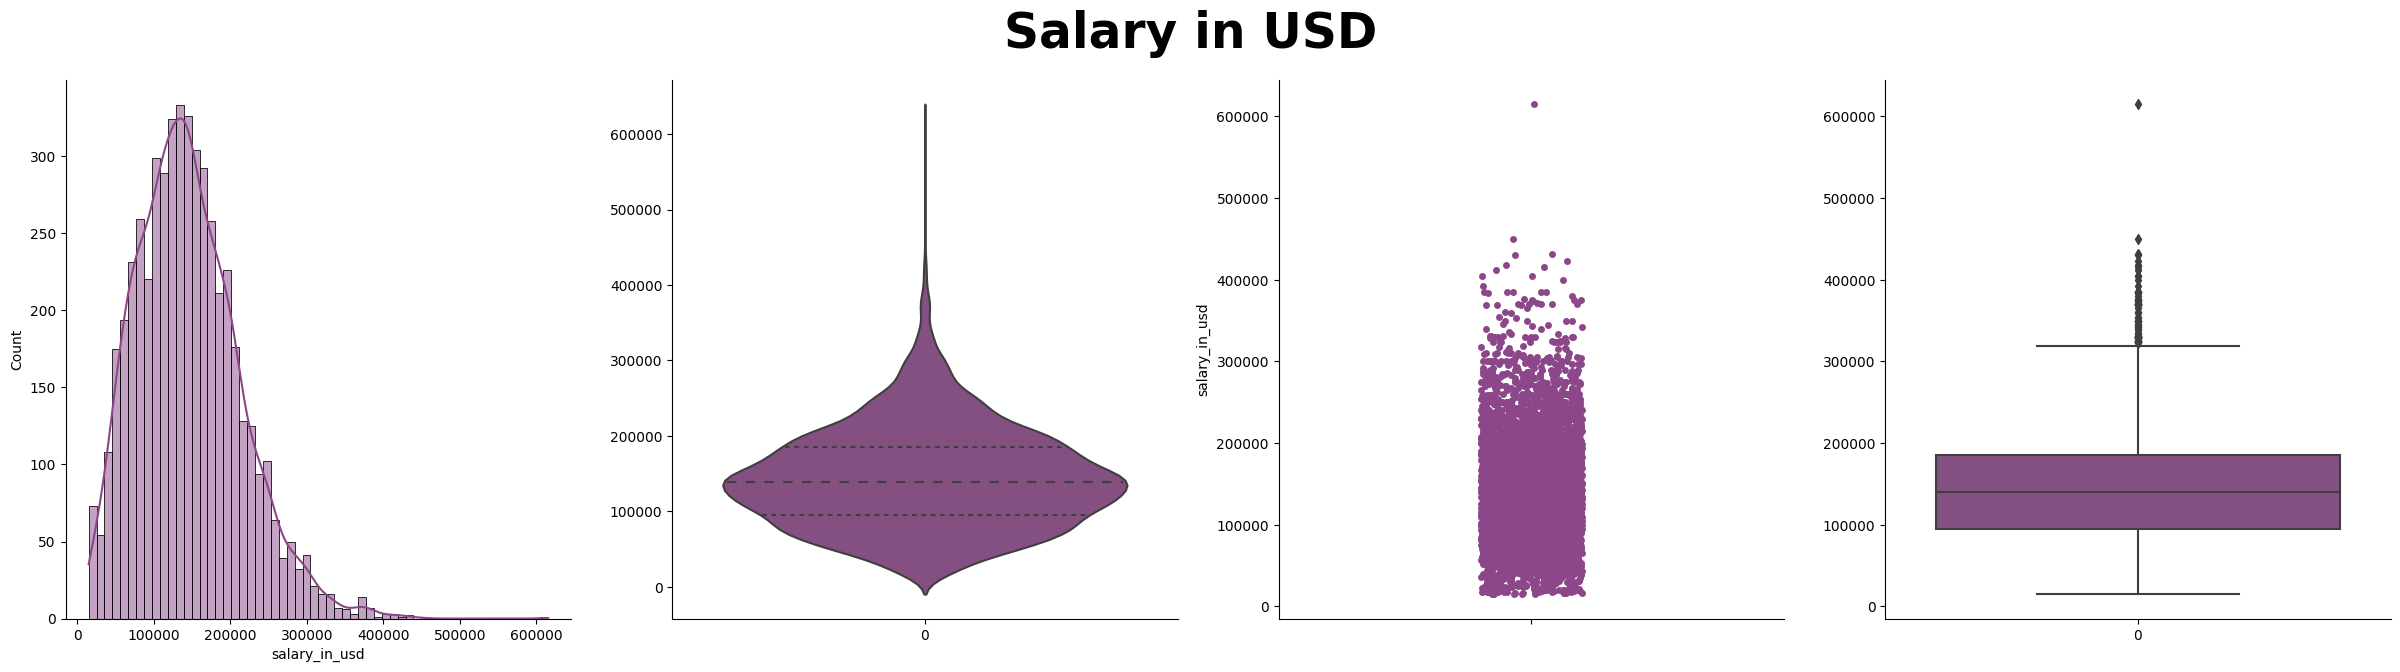

In [49]:
f, ax = plt.subplots(1, 4, figsize=(30, 7))
sns.histplot(df['salary_in_usd'], ax=ax[0], color="#8B4789", kde=True)
sns.violinplot(df['salary_in_usd'], ax=ax[1], color="#8B4789", scale='width', inner='quartile')
sns.stripplot(df['salary_in_usd'], ax=ax[2], color="#8B4789")
sns.boxplot(df['salary_in_usd'], ax=ax[3], color="#8B4789")
for i in range(4):
    ax[i].spines[['top', 'right']].set_visible(False) 

f.suptitle('Salary in USD', color='black', size=35, fontweight='bold')

plt.show()

In [50]:
data = df.groupby('job_title',as_index=False)['salary_in_usd'].max().sort_values(by='salary_in_usd',ascending=False).head(10)
title='Top 10 Highest Paid'
generate_bar_chart(data, 'job_title', 'salary_in_usd', title, color_discrete)

**Note:**
> Although there are around 1.65L`BI/Analytics`, they rank ahead of `Reasearch Scientists` and `Data Analyst`. 

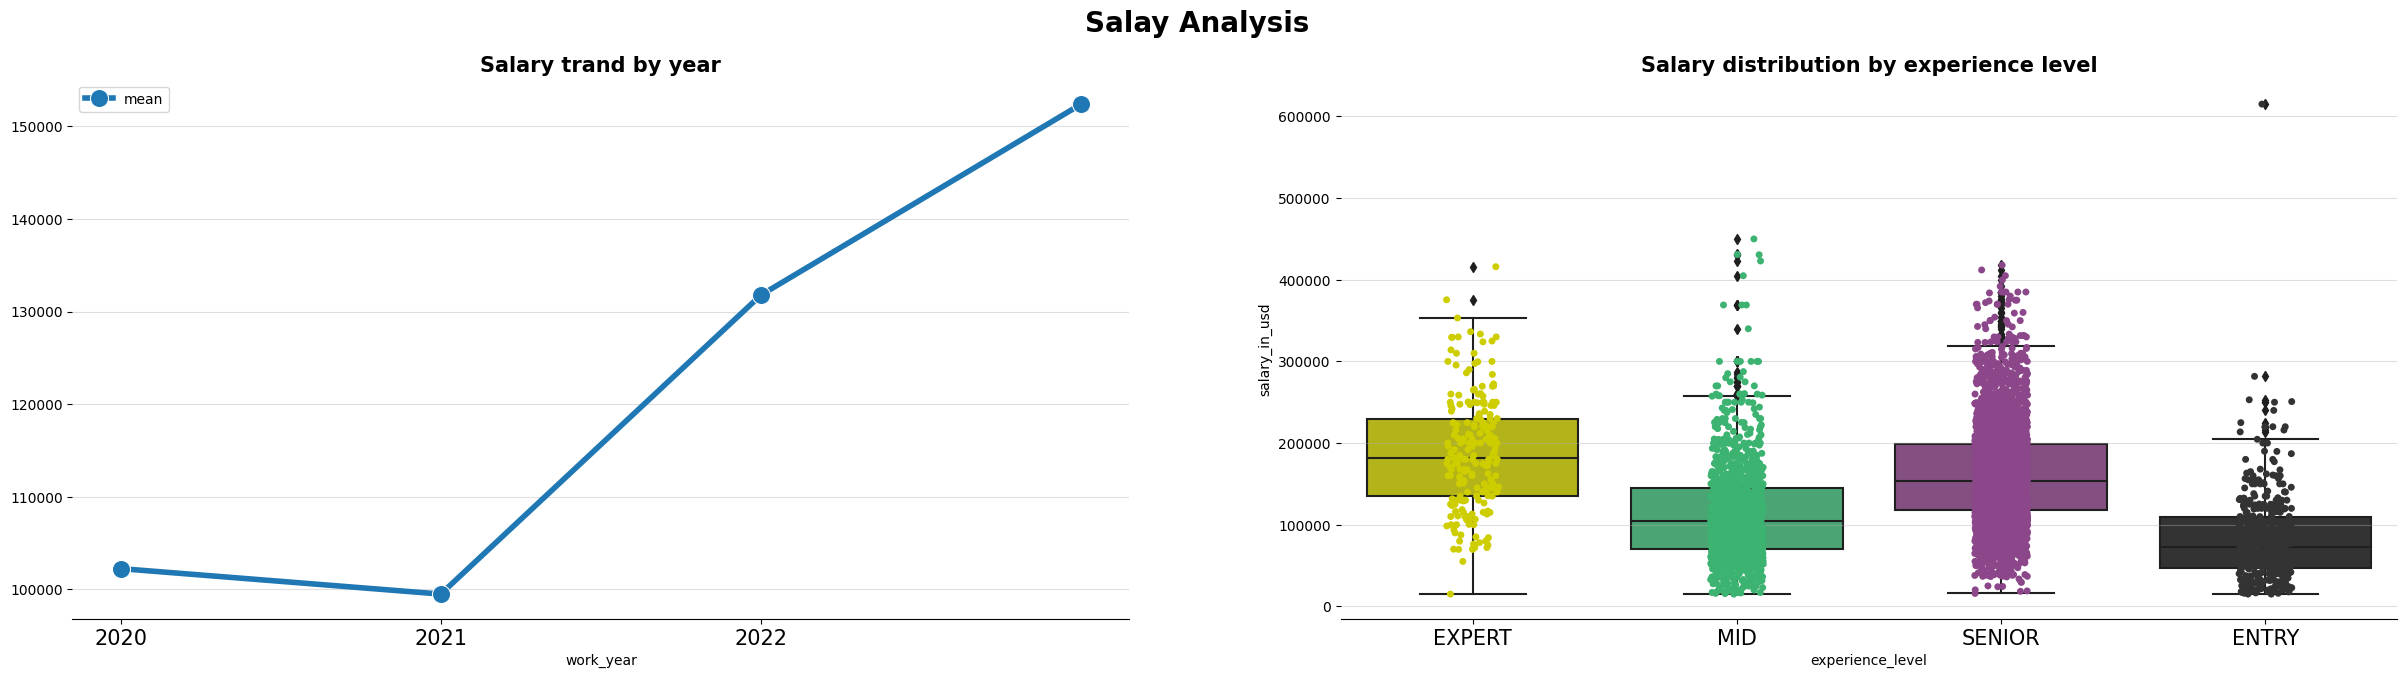

In [51]:
f, ax = plt.subplots(1, 2, figsize=(30, 7))

d1 = df.groupby('work_year')['salary_in_usd'].mean()
sns.lineplot(x=d1.index, y=d1.values, ax=ax[0], ls='-', linewidth=4, label='mean', marker='o', markersize=13)
sns.boxplot(df, x='experience_level', y='salary_in_usd', ax=ax[1], palette=color)
sns.stripplot(df, x='experience_level', y='salary_in_usd', ax=ax[1], palette=color)


for a in ax:
    a.spines[['top', 'right', 'left']].set_visible(False)
    a.tick_params(axis='x', colors='black')
    a.tick_params(axis='y', colors='black')
    a.spines['left'].set_color('black')
    a.spines['bottom'].set_color('black') 
    a.tick_params(axis='x', labelsize=15)
    a.grid(axis='y', linestyle='-', alpha=0.4)


ax[0].set_title('Salary trand by year', fontweight='bold', size=15)
ax[0].xaxis.set_ticks([2020, 2021, 2022])

ax[1].set_title('Salary distribution by experience level', fontweight='bold', size=15)

plt.suptitle('Salay Analysis', fontweight='bold', size=20)
plt.show()


**Note:** 
> Despite the small number of experts, they are the largest type of employment in salaries.
>Salaries in 2020 were very low compared to other years, then began to increase from 2021.

In [52]:
fig = px.box(
    df,
    x="employment_type",
    y="salary_in_usd",
    title="Distribution of Salary Across employment type",
    labels={'Brand': 'Brand', 'RAM ': 'RAM'},
    color_discrete_sequence=["#333333"],
    height=540,
    width=840,
)

fig.update_layout(
    title_font=dict(size=20),
    xaxis=dict(title_font=dict(size=14), tickfont=dict(size=12)),
    yaxis=dict(title_font=dict(size=14), tickfont=dict(size=12)),
)

fig.show()

# **Company Location**

In [53]:
df['company_location'].unique()

array(['United States', 'United Kingdom', 'Canada', 'India',
       'Netherlands', 'Lithuania', 'Portugal', 'Gibraltar', 'Australia',
       'France', 'Colombia', 'Ukraine', 'Slovenia', 'Romania', 'Spain',
       'Greece', 'Latvia', 'Mauritius', 'Germany', 'Poland',
       'Russian Federation', 'Italy', 'Korea, Republic of', 'Estonia',
       'Czechia', 'Switzerland', 'Brazil', 'Qatar', 'Kenya', 'Denmark',
       'Ghana', 'Sweden', 'Philippines', 'Türkiye', 'Andorra', 'Ecuador',
       'Mexico', 'Israel', 'Nigeria', 'Saudi Arabia', 'Norway',
       'Argentina', 'Japan', 'South Africa', 'Hong Kong',
       'Central African Republic', 'Finland', 'Ireland', 'Singapore',
       'Thailand', 'Croatia', 'Armenia', 'Bosnia and Herzegovina',
       'Pakistan', 'Iran, Islamic Republic of', 'Bahamas', 'Hungary',
       'Austria', 'Puerto Rico', 'American Samoa', 'Belgium', 'Indonesia',
       'Egypt', 'United Arab Emirates', 'Malaysia', 'Honduras', 'Algeria',
       'Iraq', 'China', 'New Zealand'

In [54]:
df['company_location'].value_counts()

company_location
United States     4071
United Kingdom     342
Canada             178
Germany             71
Spain               56
                  ... 
Qatar                1
Hong Kong            1
South Africa         1
Andorra              1
Malta                1
Name: count, Length: 74, dtype: int64

In [55]:
df['company_location'].value_counts().size

74

In [56]:
top10 = df['company_location'].value_counts()[:10]
generate_bar_chart(df, top10.index, top10.values, 'Top 10 campany loction', color_discrete)

**Note:**
>More than half are located in the United States.

In [57]:
data = df.groupby('company_location',as_index=False)['salary_in_usd'].max().sort_values(by='salary_in_usd',ascending=False).head(10)
title='Top 10 campany location with Highest Paid'
generate_bar_chart(data, 'company_location', 'salary_in_usd', title, color_discrete)

# **Company Size**

In [58]:
df['company_size'].unique()

array(['Medium', 'Small', 'Large'], dtype=object)

In [59]:
df['company_size'].value_counts()

company_size
Medium    4439
Large      523
Small      167
Name: count, dtype: int64

In [60]:
value_count = df['company_size'].value_counts()
df3 = pd.DataFrame({'company_size': value_count.index, 'count': value_count.values})

In [61]:
generate_bar_chart(df3, 'company_size', 'count', 'Employment type count', colors)

>More than half are worked in medium company.

In [62]:
fig = px.box(
    df,
    x="company_size",
    y="salary_in_usd",
    title="Distribution of Salary Across Company Size",
    labels={'Brand': 'Brand', 'RAM ': 'RAM'},
    color_discrete_sequence=["#333333"],
    height=540,
    width=840,
)

fig.update_layout(
    font_color=FONT_COLOR,
    title_font_size=18,
    plot_bgcolor=BACKGROUND_COLOR,
    paper_bgcolor=BACKGROUND_COLOR,
    bargap=0.2,
    bargroupgap=0.1,
    title_font=dict(size=20),
    xaxis=dict(title_font=dict(size=14), tickfont=dict(size=12)),
    yaxis=dict(title_font=dict(size=14), tickfont=dict(size=12)),
)

fig.show()

In [63]:
generate_histogram_chart(df,
                         "company_size",
                         "experience_level",
                         color,
                         "Distribution of experience level for company size")

* Multivariate Analysis

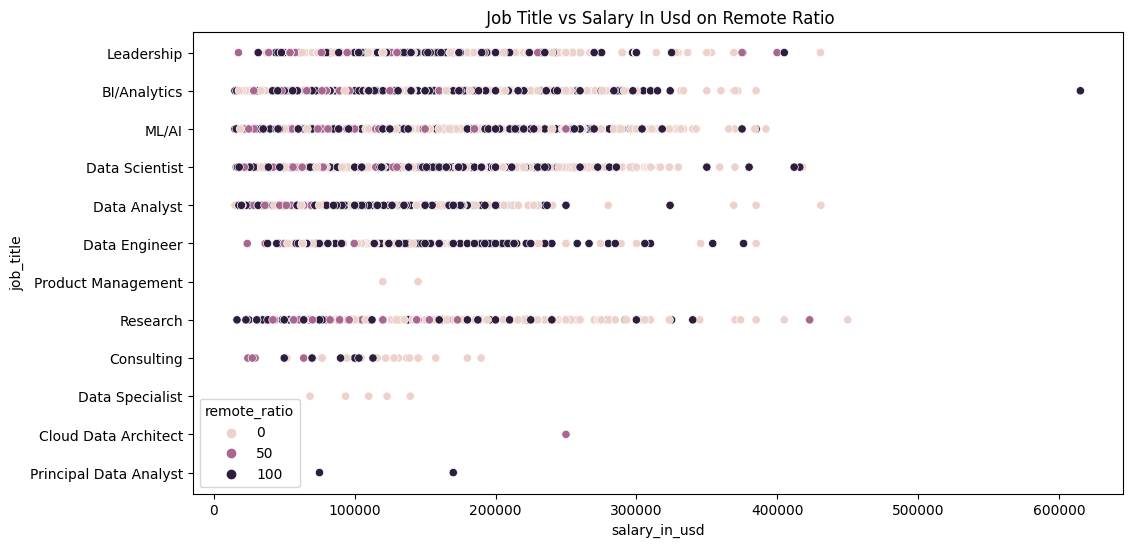

In [64]:
plt.figure(figsize=(12,6))
plt.title(" Job Title vs Salary In Usd on Remote Ratio")
sns.scatterplot(y='job_title', x='salary_in_usd', hue='remote_ratio', data=df)
plt.show()

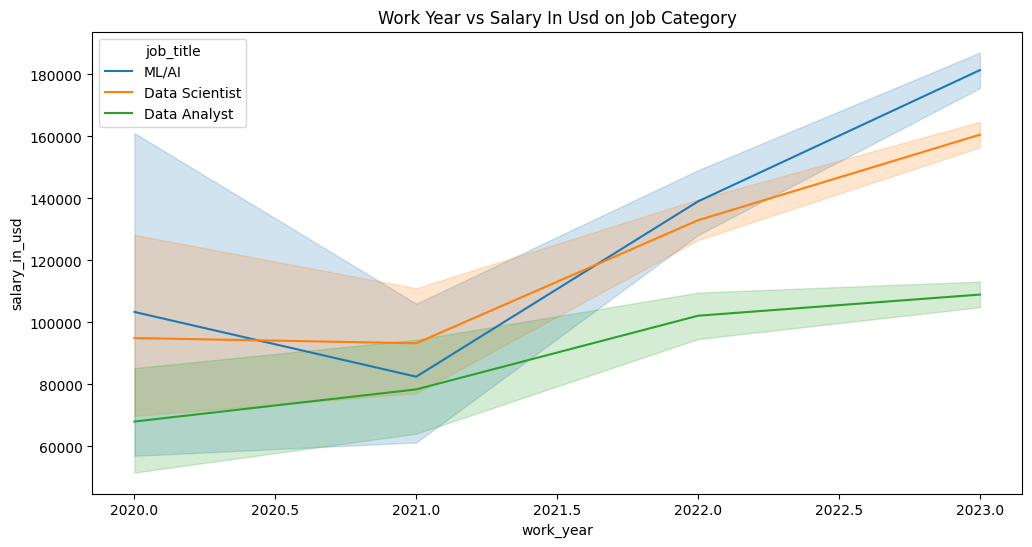

In [65]:
selected_categories = ['ML/AI', 'Data Scientist', 'Data Analyst']
df_selected = df[df['job_title'].isin(selected_categories)]

plt.figure(figsize=(12, 6))
plt.title("Work Year vs Salary In Usd on Job Category")
sns.lineplot(x='work_year', y='salary_in_usd', hue='job_title', data=df_selected)

plt.show()

# **Conclusion from the Above Analysis:**
>The Country which has Maximum Jobs in the Data Science Feild is US and Full time type Employees has Maximum Salaries in Data Science feild. Employees which has Experience as Senior and Executive Level has maximum salaries. The Top 3 Popular Roles in Data Science are:
> - BI/Data Analysts
> - Data Scientist
> - ML/AI Engineer 

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=63a23088-2600-4d68-b4c0-aa7797be8316' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>